## Analyzing Hamlet

In [1]:
%load_ext autoreload
%autoreload 2

In [29]:
import src.data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from collections import OrderedDict

from IPython.display import display

pd.options.display.max_rows = 999
pd.options.display.max_columns = 999
pd.set_option("display.max_columns", None)

In [33]:
import itertools

In [25]:
file_names = {
    'aurora':'2020-01-01-till-2021-02-24-aurora.csv',
    'hamlet':'2020-01-01-till-2021-02-24-hamlet.csv',
    'mercandia':'2020-01-01-till-2021-02-24-mercandia-iv.csv',
    'tycho-brahe':'2020-01-01-till-2021-02-24-tycho-brahe.csv',
}

In [27]:
dfs = OrderedDict()

for ship_name, file_name in file_names.items():
    
    file_path = os.path.join(src.data.path_ships,file_name)
    reader = pd.read_csv(file_path, chunksize=1000, iterator=True)  # Loading a small part of the data
    dfs[ship_name] = next(reader)
    

In [30]:
for ship_name, df in dfs.items():
    
    display(df.describe())
    

,Latitud (deg),Longitud (deg),Effekt DG Total (kW),Effekt EM Thruster Total (kW),Sin EM1 (),Sin EM2 (),Sin EM3 (),Sin EM4 (),Cos EM1 (),Cos EM2 (),Cos EM3 (),Cos EM4 (),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Effekt hotell Total (kW),Effekt Consumption Total (kW),Förbrukning GEN alla (kg/h)
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,0.0,1000.000000,1000.000000
mean,56.035354,12.651880,2601.87700,1740.551000,0.007387,0.005132,-0.066902,-0.078709,-0.905238,-0.906265,-0.947501,-0.945562,9.145800,72.910000,77.125900,NaN,1740.551000,602.162758
std,0.002731,0.022648,708.03538,654.113325,0.194653,0.194305,0.222817,0.222843,0.353659,0.352732,0.193330,0.195079,2.369589,14.803862,21.691768,NaN,654.113325,138.959423
min,56.032620,12.617400,778.00000,26.000000,-0.421910,-0.429780,-0.995480,-0.994420,-0.990390,-0.990880,-0.993380,-0.993470,0.000000,38.100000,3.600000,NaN,26.000000,231.971540
25%,56.033700,12.631528,1997.00000,1202.750000,-0.057637,-0.056093,-0.053560,-0.068790,-0.990110,-0.990600,-0.993290,-0.991880,9.270000,61.900000,64.300000,NaN,1202.750000,481.433933
50%,56.034150,12.651500,2832.00000,1959.000000,-0.006835,-0.013935,-0.053310,-0.062740,-0.988680,-0.989290,-0.993160,-0.991790,9.965000,78.400000,81.100000,NaN,1959.000000,643.983605
75%,56.036665,12.672260,2956.25000,2089.750000,0.027138,0.019350,-0.053130,-0.062590,-0.981862,-0.983453,-0.993070,-0.991670,10.540000,81.425000,88.100000,NaN,2089.750000,672.958625
max,56.042770,12.688280,4075.00000,2958.000000,0.999970,0.999970,0.990080,0.999970,0.999970,0.999970,-0.008300,0.012940,10.750000,92.000000,315.299990,NaN,2958.000000,914.652160


,Latitud (deg),Longitud (deg),Cylindereffekt alla (kW),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Förbrukning HM alla (L/h)
count,1000.000000,1000.000000,1000.0,1000.0,0.0,1.000000e+03,1000.0
mean,56.043084,12.690383,0.0,0.0,NaN,6.660000e+01,0.0
std,0.000009,0.000016,0.0,0.0,NaN,1.421797e-14,0.0
min,56.043060,12.690340,0.0,0.0,NaN,6.660000e+01,0.0
25%,56.043080,12.690380,0.0,0.0,NaN,6.660000e+01,0.0
50%,56.043080,12.690380,0.0,0.0,NaN,6.660000e+01,0.0
75%,56.043090,12.690390,0.0,0.0,NaN,6.660000e+01,0.0
max,56.043110,12.690420,0.0,0.0,NaN,6.660000e+01,0.0


,Latitud (deg),Longitud (deg),Effekt EM alla (kW),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Fart genom vatten (kts)
count,1000.000000,1000.000000,1000.0,1000.0,1000.000000,1000.000000,1000.0
mean,56.044103,12.690595,0.0,0.0,244.112409,188.963690,0.0
std,0.000008,0.000005,0.0,0.0,0.032971,106.829354,0.0
min,56.044090,12.690580,0.0,0.0,244.100010,0.190000,0.0
25%,56.044100,12.690590,0.0,0.0,244.100010,93.917500,0.0
50%,56.044110,12.690590,0.0,0.0,244.100010,189.219990,0.0
75%,56.044110,12.690600,0.0,0.0,244.100010,288.012510,0.0
max,56.044110,12.690600,0.0,0.0,244.200000,359.410000,0.0


,Latitud (deg),Longitud (deg),Effekt DG Total (kW),Effekt EM Thruster Total (kW),Sin EM1 (),Sin EM2 (),Sin EM3 (),Sin EM4 (),Cos EM1 (),Cos EM2 (),Cos EM3 (),Cos EM4 (),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Effekt hotell Total (kW),Effekt Consumption Total (kW)
count,1000.0000,1.000000e+03,1000.000000,1000.0,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.0,1000.0,1000.000000,0.0,1000.0
mean,56.0331,1.261721e+01,615.676000,0.0,-0.96753,-0.981826,-0.755766,-0.745746,0.236585,0.196643,0.653533,0.668854,0.0,77.6,115.550380,NaN,0.0
std,0.0000,1.777246e-15,40.075967,0.0,0.00013,0.000125,0.000136,0.000129,0.000264,0.000571,0.000135,0.000128,0.0,0.0,86.440585,NaN,0.0
min,56.0331,1.261721e+01,526.000000,0.0,-0.96783,-0.982090,-0.756960,-0.746060,0.236210,0.195650,0.652770,0.668550,0.0,77.6,13.840000,NaN,0.0
25%,56.0331,1.261721e+01,580.750000,0.0,-0.96762,-0.981900,-0.755830,-0.745850,0.236420,0.196110,0.653440,0.668760,0.0,77.6,50.702500,NaN,0.0
50%,56.0331,1.261721e+01,623.000000,0.0,-0.96756,-0.981840,-0.755740,-0.745760,0.236540,0.196620,0.653530,0.668820,0.0,77.6,65.170000,NaN,0.0
75%,56.0331,1.261721e+01,643.000000,0.0,-0.96747,-0.981750,-0.755680,-0.745670,0.236630,0.197200,0.653590,0.668910,0.0,77.6,203.867503,NaN,0.0
max,56.0331,1.261721e+01,730.000000,0.0,-0.96710,-0.981350,-0.755340,-0.745270,0.238250,0.197850,0.654020,0.669340,0.0,77.6,298.769990,NaN,0.0


In [88]:
file_path = os.path.join(src.data.path_ships,file_names['aurora']) 
reader = pd.read_csv(file_path, chunksize=1000000, iterator=True)  # Loading a small part of the data
df_raw = next(reader)
df_raw.set_index('Tidpunkt [UTC]', inplace=True)
df_raw.index = pd.to_datetime(df_raw.index)

In [89]:
mask = df_raw['Fart över grund (kts)']>1
df = df_raw.loc[mask].copy()

array([[<AxesSubplot:title={'center':'Kurs över grund (deg)'}>]],
      dtype=object)

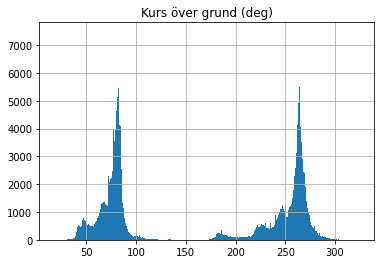

In [90]:
df.hist(column='Kurs över grund (deg)', bins=1000)

In [91]:
mask = df_raw['Kurs över grund (deg)'] < 150
df_direction_1 = df.loc[mask]
df_direction_1.describe()

,Latitud (deg),Longitud (deg),Effekt DG Total (kW),Effekt EM Thruster Total (kW),Sin EM1 (),Sin EM2 (),Sin EM3 (),Sin EM4 (),Cos EM1 (),Cos EM2 (),Cos EM3 (),Cos EM4 (),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Effekt hotell Total (kW),Effekt Consumption Total (kW),Förbrukning GEN alla (kg/h)
count,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,266524.000000,0.0,266524.000000,266524.000000
mean,56.037673,12.655727,2634.363333,1716.531093,-0.046991,-0.054394,-0.055736,-0.084306,-0.747588,-0.750587,-0.831279,-0.829612,8.864419,75.034341,74.208094,NaN,1716.531093,591.578277
std,0.003133,0.023894,774.448580,710.544503,0.265827,0.264883,0.294407,0.292742,0.593747,0.590230,0.456242,0.456814,2.584500,25.929102,13.209959,NaN,710.544503,157.369781
min,56.032440,12.616670,578.000000,-183.000000,-0.990970,-0.990970,-0.995570,-0.994720,-0.990540,-0.991240,-0.994930,-0.995030,1.010000,17.500000,17.900000,NaN,-183.000000,149.437560
25%,56.035170,12.634130,2280.000000,1412.000000,-0.113370,-0.118070,-0.051390,-0.070560,-0.988530,-0.989170,-0.994570,-0.991850,8.190000,66.400000,67.600000,NaN,1412.000000,516.508445
50%,56.037640,12.656040,2720.000000,1833.000000,-0.054380,-0.062710,-0.039520,-0.068600,-0.984950,-0.984950,-0.993230,-0.991790,9.820000,74.200000,78.000000,NaN,1833.000000,601.147495
75%,56.039730,12.678430,3070.000000,2102.000000,0.010830,-0.002170,-0.012700,-0.065460,-0.965520,-0.967710,-0.993010,-0.991640,10.460000,81.700000,82.300000,NaN,2102.000000,679.162052
max,56.048360,12.691090,6780.000000,5385.000000,0.999970,0.999970,0.990780,0.999970,0.999970,0.999970,0.993960,0.999970,15.120000,261.600010,148.500000,NaN,5385.000000,1535.088300


<AxesSubplot:xlabel='Longitud (deg)'>

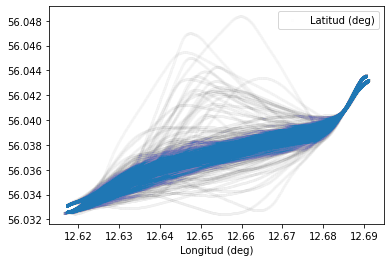

In [92]:
df_direction_1.plot(x='Longitud (deg)', y = 'Latitud (deg)', style='.', alpha=0.005)

<ipython-input-130-7eae8b5cd31e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_direction_1[delta_key] = np.arctan2(df_direction_1[sin_key],df_direction_1[cos_key])


<AxesSubplot:xlabel='Tidpunkt [UTC]'>

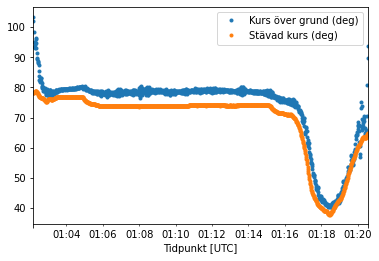

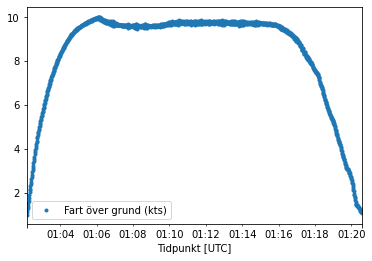

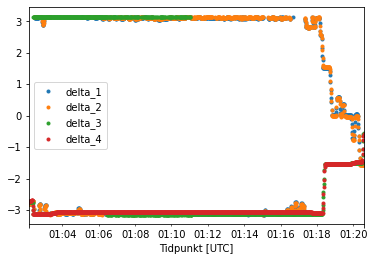

In [130]:
deltas = []
for i in range(1,5):
    sin_key = 'Sin EM%i ()' % i
    cos_key = 'Cos EM%i ()' % i
    delta_key = 'delta_%i' % i
    deltas.append(delta_key)

    df_direction_1[delta_key] = np.arctan2(df_direction_1[sin_key],df_direction_1[cos_key])

df_plot = df_direction_1.loc['2020-01-01 01:00':'2020-01-01 02:00']
    
df_plot.plot(y=['Kurs över grund (deg)','Stävad kurs (deg)'],style='.')
df_plot.plot(y='Fart över grund (kts)',style='.')

df_plot.plot(y=deltas,style='.')



In [115]:
df_direction_1.head()

,Latitud (deg),Longitud (deg),Effekt DG Total (kW),Effekt EM Thruster Total (kW),Sin EM1 (),Sin EM2 (),Sin EM3 (),Sin EM4 (),Cos EM1 (),Cos EM2 (),Cos EM3 (),Cos EM4 (),Fart över grund (kts),Stävad kurs (deg),Kurs över grund (deg),Effekt hotell Total (kW),Effekt Consumption Total (kW),Förbrukning GEN alla (kg/h),delta_1,delta_2,delta_3,delta_4
Tidpunkt [UTC],,,,,,,,,,,,,,,,,,,,,,
2019-12-31 23:00:32+00:00,56.03263,12.61745,3544.0,2519.0,-0.29916,-0.27444,-0.42230,-0.39120,-0.93893,-0.94717,-0.89975,-0.91080,1.07,77.7,96.2,NaN,2519.0,844.79145,-2.833144,-2.859568,-2.702762,-2.735906
2019-12-31 23:00:33+00:00,56.03263,12.61746,3624.0,2545.0,-0.36237,-0.36194,-0.44962,-0.41751,-0.91211,-0.91571,-0.88739,-0.90009,1.20,77.7,95.6,NaN,2545.0,838.44566,-2.763427,-2.765182,-2.672618,-2.707278
2019-12-31 23:00:34+00:00,56.03263,12.61747,3711.0,2564.0,-0.40778,-0.38565,-0.46085,-0.43341,-0.89569,-0.90677,-0.88300,-0.89291,1.30,77.8,94.2,NaN,2564.0,835.25410,-2.714366,-2.739467,-2.660568,-2.689701
2019-12-31 23:00:35+00:00,56.03262,12.61748,3751.0,2573.0,-0.42026,-0.39099,-0.46204,-0.43759,-0.89023,-0.90463,-0.88150,-0.89032,1.41,77.8,93.7,NaN,2573.0,840.32793,-2.700529,-2.733631,-2.658811,-2.684770
2019-12-31 23:00:36+00:00,56.03262,12.61750,3736.0,2575.0,-0.42142,-0.39792,-0.46194,-0.44769,-0.89008,-0.90152,-0.88153,-0.88635,1.50,77.9,93.2,NaN,2575.0,847.20839,-2.699399,-2.725924,-2.658914,-2.673878
